In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Read Image Files

In [2]:
file_path = 'test.jpg'

if os.path.isfile(file_path): # Check If File Exists
    img = cv2.imread(file_path)
else:
    print('File "{}" Not Found'.format(file_path))

# Display Image

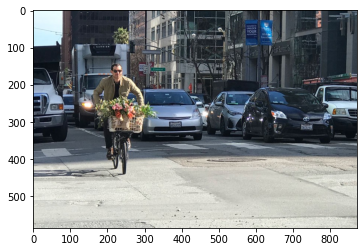

In [3]:
def show_image(img):  # OpenCV
    cv2.imshow('Frame', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def plot_image(img):  # matplotlib
    if len(img.shape)==3:
        im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(im_rgb)
    else:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        
    
plot_image(img)

# Convert BGR image to RGB
opencv -> B-G-R

Matplotlib & PIL -> R-G-B

There is no way to find wheather an image is BGR or RGB

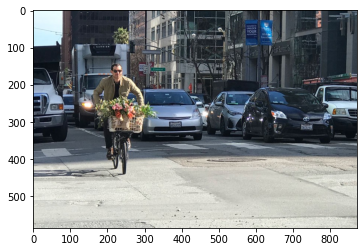

In [4]:
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

# Convert Grayscale

Orginal Image shape:  (586, 872, 3)
Gray Image shape:  (586, 872)


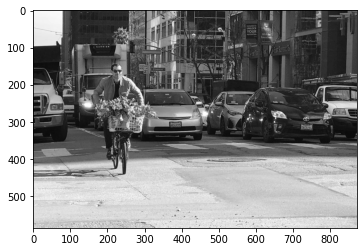

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('Orginal Image shape: ',img.shape)
print('Gray Image shape: ',img_gray.shape)
plot_image(img_gray)

# Resize Image

Orginal Image shape:  (586, 872, 3)
Resized Image shape:  (234, 349, 3)


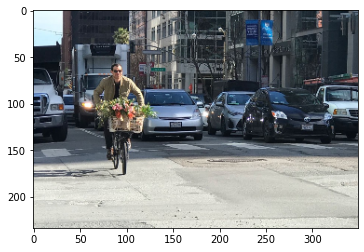

In [6]:
img_resized = cv2.resize(img,(300,400))  # resize to any size

img_resized_ratio = cv2.resize(img,(0,0), fx=0.4, fy=0.4) # keeping aspect ratio

print('Orginal Image shape: ',img.shape)
print('Resized Image shape: ',img_resized_ratio.shape)
plot_image(img_resized_ratio)

# Padding Image

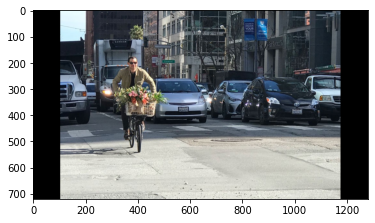

In [7]:
def padding_img(img, target_dim = (720,1280), color = (0, 0, 0), Fit_size=True):
    new_image_height, new_image_width = target_dim
    old_image_height, old_image_width, channels = img.shape

    h_ratio = new_image_height/old_image_height
    w_ratio = new_image_width/old_image_width
    
    if ((h_ratio<1) or (w_ratio<1)) and (not Fit_size):
        print('Target image dimension is smaller than input, Enabling Fit size option')
        Fit_size = True
        
    if Fit_size:
        fit_ratio = min(h_ratio,w_ratio)
        img = cv2.resize(img,(0,0), fx=fit_ratio, fy=fit_ratio)
        old_image_height, old_image_width, channels = img.shape
        
    result = np.full((new_image_height, new_image_width, channels), color, dtype=np.uint8)

    x_center = (new_image_width - old_image_width) // 2
    y_center = (new_image_height - old_image_height) // 2

    result[y_center:y_center+old_image_height, 
           x_center:x_center+old_image_width] = img

    return result

pad_im = padding_img(img)
plot_image(pad_im)

# Concat Image

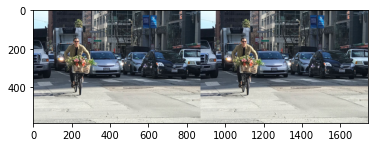

In [9]:
horizontal = np.concatenate((img, img), axis=1)
plot_image(horizontal)

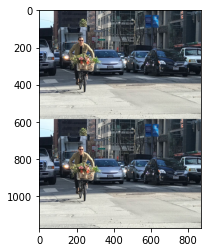

In [11]:
vertical = np.concatenate((img, img), axis=0)
plot_image(vertical)

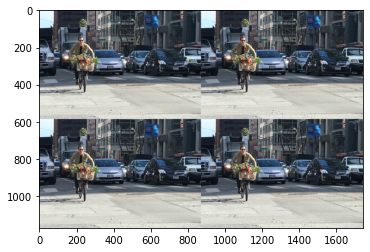

In [13]:
horizontal1 = np.concatenate((img, img), axis=1)
horizontal2 = np.concatenate((img, img), axis=1)
four_in_one = np.concatenate((horizontal1, horizontal2), axis=0)
plot_image(four_in_one)